# Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the cleaned datasets
netflix_df = pd.read_csv('https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/netflix_film_data.csv')
imdb_df = pd.read_csv('https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/netflix_imdb_scores.csv')

## 1. Data Merging

### 1.1 Identify Common Columns

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          7293 non-null   object 
 1   type             7293 non-null   object 
 2   title            7293 non-null   object 
 3   director         7293 non-null   object 
 4   cast             7293 non-null   object 
 5   country          7293 non-null   object 
 6   date_added       7293 non-null   object 
 7   release_year     7293 non-null   int64  
 8   rating           7290 non-null   object 
 9   num_releases     7293 non-null   int64  
 10  listed_in        7293 non-null   object 
 11  description      7293 non-null   object 
 12  num_listed_in    7293 non-null   int64  
 13  first_cast       7293 non-null   object 
 14  cast_freq_mean   7293 non-null   float64
 15  genre_freq_mean  7293 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 911.8+ KB


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5278 non-null   object 
 1   type               5278 non-null   object 
 2   description        5278 non-null   object 
 3   release_year       5278 non-null   int64  
 4   age_certification  2996 non-null   object 
 5   runtime            5278 non-null   int64  
 6   imdb_id            5278 non-null   object 
 7   imdb_score         5278 non-null   float64
 8   imdb_votes         5278 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 371.2+ KB


In [ ]:
common_titles = list(set(imdb_df["title"]) & set(netflix_df["title"]))
print('Common Titles:', len(common_titles))

common_release_year = list(set(imdb_df["release_year"]) & set(netflix_df["release_year"]))
print('Common Release Years:', len(common_release_year))

common_age_certification_year = list(set(imdb_df["age_certification"]) & set(netflix_df["rating"]))
print('Common Age Certifications:', len(common_age_certification_year))

Common Titles: 3177
Common Release Years: 64
Common Age Certifications: 12


The datasets share the `title`, `release_year`, and `age_certification` columns and contain common values. The title and release year are sufficient to identify a unique film in this dataset.

## 1.2 Broad Merge

In [ ]:
# Rename the rating column to age_certification to be consistent with the
# column label in the other dataset
netflix_df = netflix_df.rename(columns={'rating': 'age_certification'})

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,age_certification,num_releases,listed_in,description,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,Ama Qamata,1.157895,597.666667
1,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,3,Mayur More,2.000000,608.000000
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,1,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,Kofi Ghanaba,1.000000,1814.666667
3,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2,Mel Giedroyc,2.000000,171.000000
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,1,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2,Melissa McCarthy,5.090909,1942.000000


In [ ]:
# Perform an inner join on film title and release year
netflix_film_imdb_data = pd.merge(imdb_df, netflix_df, how='inner', on=['title', 'release_year'])

# The duplicate type and age certification are redundant
# Remove one of each from the merged data and retain the columns which
# do not contain missing values
#
# Merging with duplicate columns forced a renaming,
# so revert the columns back to the original naming
netflix_film_imdb_data = netflix_film_imdb_data \
            .drop(columns=['type_x', 'age_certification_x']) \
            .rename(columns={'type_y': 'type', 'age_certification_y': 'age_certification'})

netflix_film_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2477 non-null   object 
 1   description_x      2477 non-null   object 
 2   release_year       2477 non-null   int64  
 3   runtime            2477 non-null   int64  
 4   imdb_id            2477 non-null   object 
 5   imdb_score         2477 non-null   float64
 6   imdb_votes         2477 non-null   int64  
 7   show_id            2477 non-null   object 
 8   type               2477 non-null   object 
 9   director           2477 non-null   object 
 10  cast               2477 non-null   object 
 11  country            2477 non-null   object 
 12  date_added         2477 non-null   object 
 13  age_certification  2477 non-null   object 
 14  num_releases       2477 non-null   int64  
 15  listed_in          2477 non-null   object 
 16  description_y      2477 

# **Outlier Analysis**

Columns with outliers:
*   release_year
*   runtime
*   imdb_score
*   imdb_votes
*   num_releases
*   cast_freq_mean

**Outliers for release_year**

*   The release_year column holds the year that the movie was released in (19XX or 20XX). The distribution has a negative skew, std of 7.3, and a median of 2018. All 335 outliers fall below the lower bound of 2011.5.

*   The datasets we used are based off of the Netflix library which is not a complete library, but one that holds popular enough movies that Netflix streams for its customers. Because Netflix's library is dependent on the popularity of movies and TV shows, it makes perfect sense that movies released longer ago will generally be less popular because people have seen them, while newer content will be more popular because fewer people have seen those movies and TV shows. It also makes sense that there is not a large portion of the distribution centered around 2020 because COVID-19 created a halt in the movie industry.

*   The slow decline in frequency of data points as time goes back is consistent with this information. Therefore, the outliers in this column accurately represent the expected distribution of the release year for each movie and TV show.

Number of 'release_year' outliers: 335
Upper Bound: 2023.5
Lower Bound: 2011.5
Median: 2018.0
Skew: -4.042983632542392


,release_year
count,2477.000000
mean,2015.745660
std,7.300435
min,1954.000000
25%,2016.000000
50%,2018.000000
75%,2019.000000
max,2021.000000


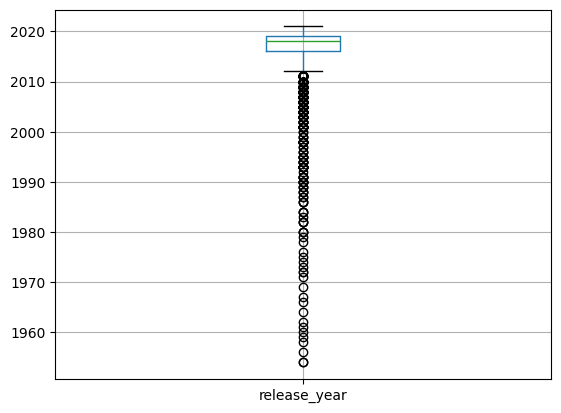

In [ ]:
# release_year outliers
col = 'release_year'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

**Outliers for runtime**
*   The runtime column holds the minute duration of the movie or single episode of the show. The distribution has a median of 94, std of 37.49 and a slight negative skew. All 6 outliers fall above the upper bound of 190.

*   Because this column holds the runtime and because the outliers are not far above the upper bound, there is no concern of this affecting the data set. The runtime column should record the real runtime of the movie or TV episode and a variability in runtimes is expected. It is also expected that very few movies exceed the 180 minute mark based on movie runtime history and that is represented in the data.

*   We will keep these outliers to maintain accuracy to the data and to possibly use these large runtimes to see how runtime affects things like rating.

Number of 'runtime' outliers: 6
Upper Bound: 190.0
Lower Bound: -18.0
Median: 94.0
Skew: -0.034278256651771324


,runtime
count,2477.000000
mean,88.945902
std,37.487654
min,0.000000
25%,60.000000
50%,94.000000
75%,112.000000
max,229.000000


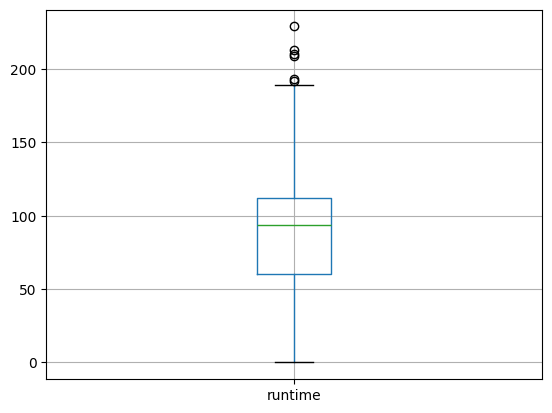

In [ ]:
# runtume outliers
col = 'runtime'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

**Outliers for imdb_score**
*   The imdb_score column holds the IMDb score for each movie between 1-10 where higher is better. The distribution has a median of 6.5, std of 1.14, and slight negative skew.

*   The outliers for this dataset are low ratings that range from 3.45 to 1.5. These outliers do not negatively affect the data in any way. A small number of low ratings are expected as well as a decrease in the frequency of data points as the score lowers. This is partly due to Netflix only streaming movies that are popular and the IMDb score is a decent indicator of the movie being popular.

* These outliers are good to have and could be helpful for determining factors that could play into the popularity or lack thereof for a movie or TV show.

Number of 'imdb_score' outliers: 44
Upper Bound: 9.45
Lower Bound: 3.45
Median: 6.5
Skew: -0.5998179409558249


,imdb_score
count,2477.000000
mean,6.384457
std,1.143071
min,1.500000
25%,5.700000
50%,6.500000
75%,7.200000
max,9.300000


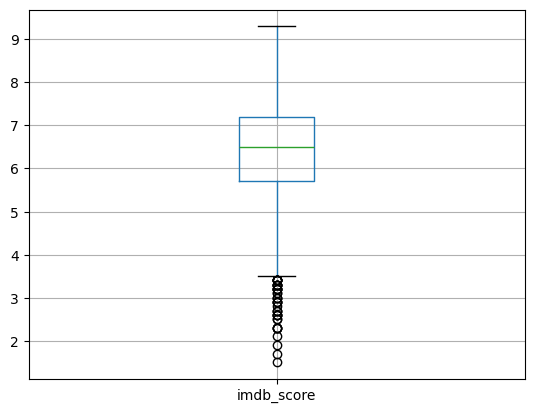

In [ ]:
# imdb_score outliers
col = 'imdb_score'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

**Outliers for imdb_votes**
*   The imdb_votes column holds the number of votes a movie reveived for its imdb_score. The distribution has a median at 2731, a std of 80048.3, and a strong positive skew.

*   The extreme distance between the median and the outliers on this column is expected because the difference in vote counts varies exponentially and is highly dependent on things like popularity, director, actors.

*   These outliers will be useful in our analysis along with imdb_score to see if vote count is directly related to a higher imdb_score or if it contributes to certain directors or cast members.

Number of 'imdb_votes' outliers: 353
Upper Bound: 27104.5
Lower Bound: -15235.5
Median: 2731.0
Skew: 13.910962834300427


,imdb_votes
count,2.477000e+03
mean,2.103402e+04
std,8.004830e+04
min,6.000000e+00
25%,6.420000e+02
50%,2.731000e+03
75%,1.122700e+04
max,2.268288e+06


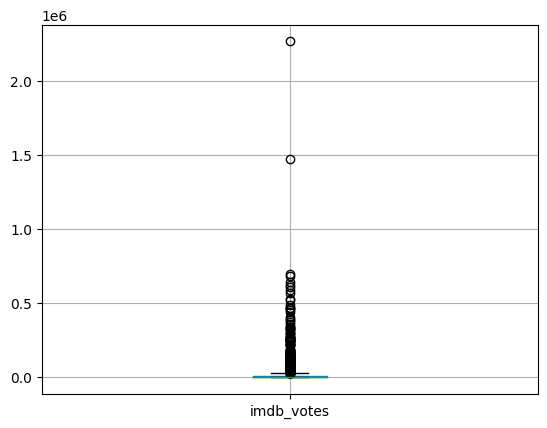

In [ ]:
# imdb_votes outliers
col = 'imdb_votes'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

**Outliers for num_releases**
*   The num_releases column holds the number of times the content went through a release cycle (1 for movies, X for X seasons of TV show). The distribution has a median of 1, a std of 0.28, and a strong positive skew.

*   Because all movies have a num_releases value of 1, it is expected that there would be a positive skew due to TV shows with a variable number of seasons(or releases). These outliers should remain in the dataset and could give us insight to how different aspects of a show could contribute to it getting more seasons.

Number of 'num_releases' outliers: 46
Upper Bound: 1.0
Lower Bound: 1.0
Median: 1.0
Skew: 31.568575544766507


,num_releases
count,2477.000000
mean,1.024627
std,0.283853
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,13.000000


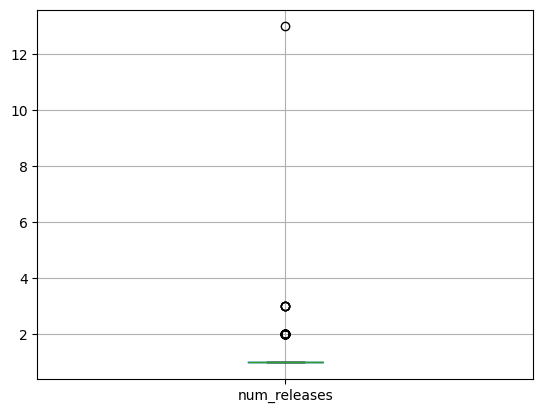

In [ ]:
# num_releases outliers
col = 'num_releases'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

**Outliers for cast_freq_mean**
*   The cast_freq_mean column holds the average frequency of actors in other films which acts as a popularity metric where higher means more popular. The distribution has a median of 2.75, a std of 2.86, and a strong positive skew.

*   These outliers are expected because the majority of actors will have a low frequency while a small handfull of actors will be stars and very popular in other movies. These outliers are very important because these actors will likely be a good indicator of a movie's success.

Number of 'cast_freq_mean' outliers: 124
Upper Bound: 9.607954545454547
Lower Bound: -3.1647727272727275
Median: 2.75
Skew: 1.9186911905176498


,cast_freq_mean
count,2477.000000
mean,3.653759
std,2.861283
min,1.000000
25%,1.625000
50%,2.750000
75%,4.818182
max,21.000000


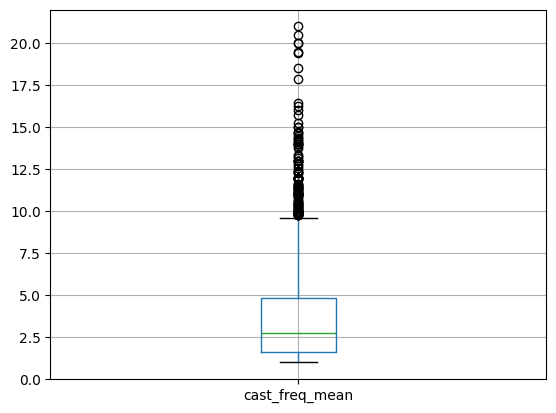

In [ ]:
# cast_freq_mean outliers
col = 'cast_freq_mean'
iqr = netflix_film_imdb_data[col].quantile(0.75) - netflix_film_imdb_data[col].quantile(0.25)

lower_bound = netflix_film_imdb_data[col].quantile(0.25) - 1.5 * iqr
upper_bound = netflix_film_imdb_data[col].quantile(0.75) + 1.5 * iqr

print(f"Number of '{col}' outliers: {((netflix_film_imdb_data[col] < lower_bound) | (netflix_film_imdb_data[col] > upper_bound)).sum()}")
print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")
print(f"Median: {netflix_film_imdb_data[col].median()}")
print(f"Skew: {netflix_film_imdb_data[col].skew()}")
netflix_film_imdb_data.boxplot(column=[col])
netflix_film_imdb_data[col].describe()

# Print CSV

In [ ]:
netflix_film_imdb_data.to_csv('netflix_film_imdb_data.csv')

# Credit

This notebook contains contributions from Anthony Brown and Fisher Eskew.

The organization of this notebook is inspired by a notebook provided as a workshop for CSC 442 at NC State University. This workshop was created by Aditi Mallavarapu, Claire Cahoon and Walt Gurley, adapted from previous workshop materials by Scott Bailey and Simon Wiles, of Stanford Libraries.